In [19]:
#!/zhome/44/9/212447/venv_1/bin/python3
import numpy as np
import PIL.Image as Image

# pip install torchsummary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from model import UNet2, EncDec, EncDec2
from dataloader import SkinLesionLoader

from loss_functions import evaluate_model

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

data_path = "/dtu/datasets1/02516//PH2_Dataset_images"
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to a fixed size
    transforms.ToTensor()             # Convert to tensor
])
# Create dataset instances for train, validation, and test
test_dataset = SkinLesionLoader(transform=transform, dataset_path=data_path, split='test')

#Create data loaders
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)


# Instantiate the model
#model = UNet2()
model = EncDec2()
# Load the state dict
model.load_state_dict(torch.load('best_model.pth'))

model.to(device)  # Move the model to the GPU if available
# Set to evaluation mode
model.eval()
print("Evaluating Model: ")
metrics = evaluate_model(model, test_loader, device)
for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")  # Format to 4 decimal places

cuda


/tmp/ipykernel_13583/4222963426.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Evaluating Model: 
tensor(0.9220, device='cuda:0')
tensor(0.7294, device='cuda:0')
tensor(0.9220, device='cuda:0')
tensor(0.8879, device='cuda:0')
tensor(0.9326, device='cuda:0')
Dice: 0.9220
IoU: 0.7294
Accuracy: 0.9220
Sensitivity: 0.8879
Specificity: 0.9326


In [12]:
# Instantiate the model
model = UNet2()
#model = EncDec2()
# Load the state dict
model.load_state_dict(torch.load('best_model.pth'))

model.to(device)  # Move the model to the GPU if available
# Set to evaluation mode
model.eval()
print("Evaluating Model: ")
metrics = evaluate_model(model, test_loader, device)
for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")  # Format to 4 decimal places

/tmp/ipykernel_13583/2111017911.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Evaluating Model: 
tensor(0.4171, device='cuda:0')
tensor(0.1395, device='cuda:0')
tensor(0.4171, device='cuda:0')
tensor(0.3214, device='cuda:0')
tensor(0.4570, device='cuda:0')
Dice: 0.4171
IoU: 0.1395
Accuracy: 0.4171
Sensitivity: 0.3214
Specificity: 0.4570


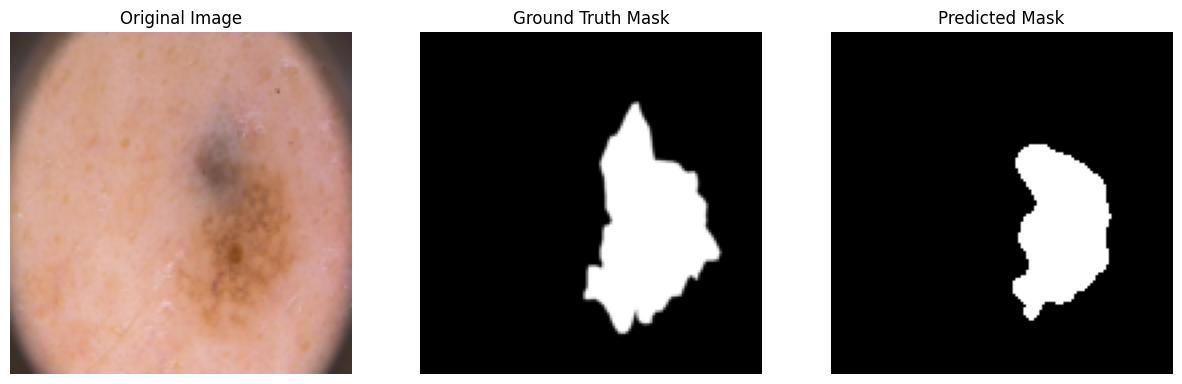

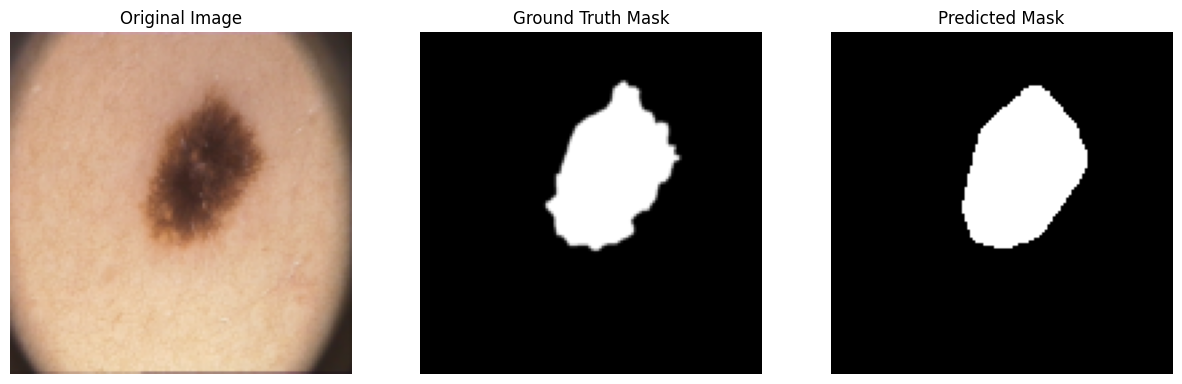

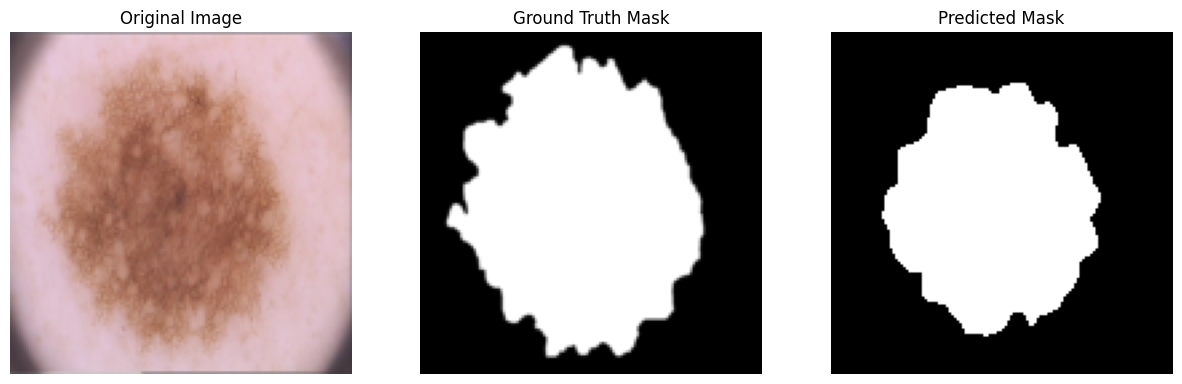

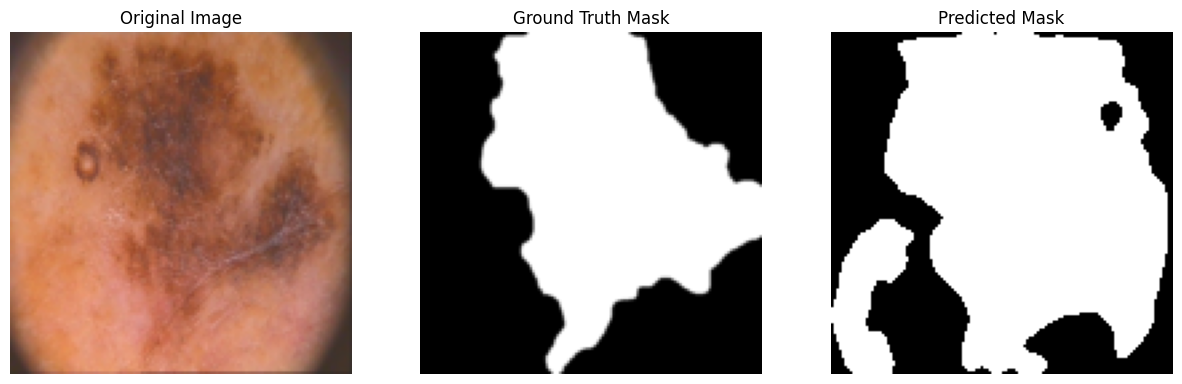

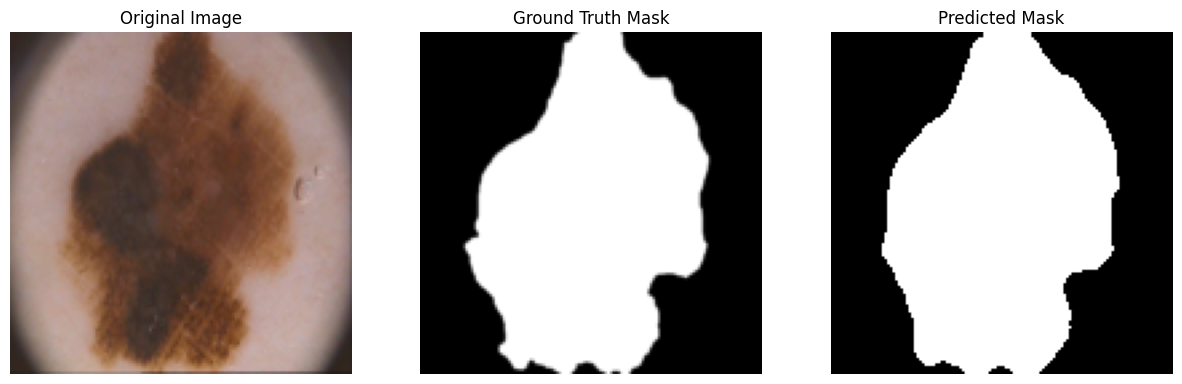

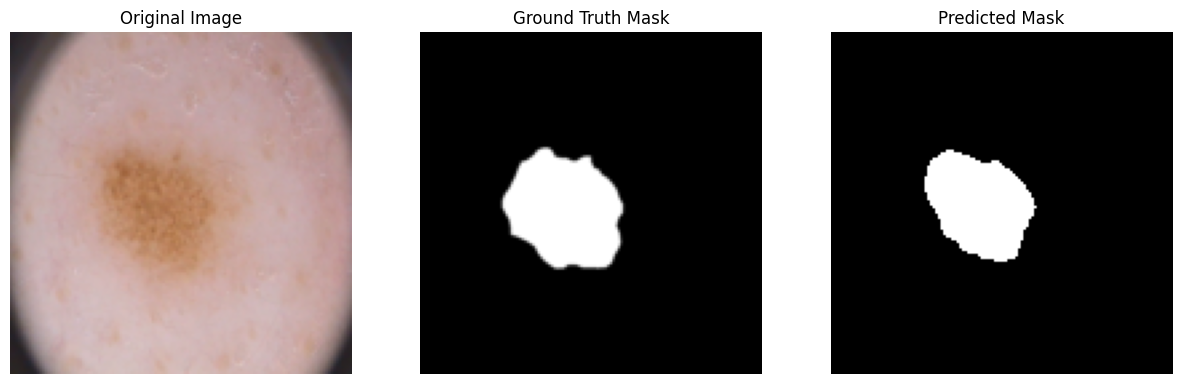

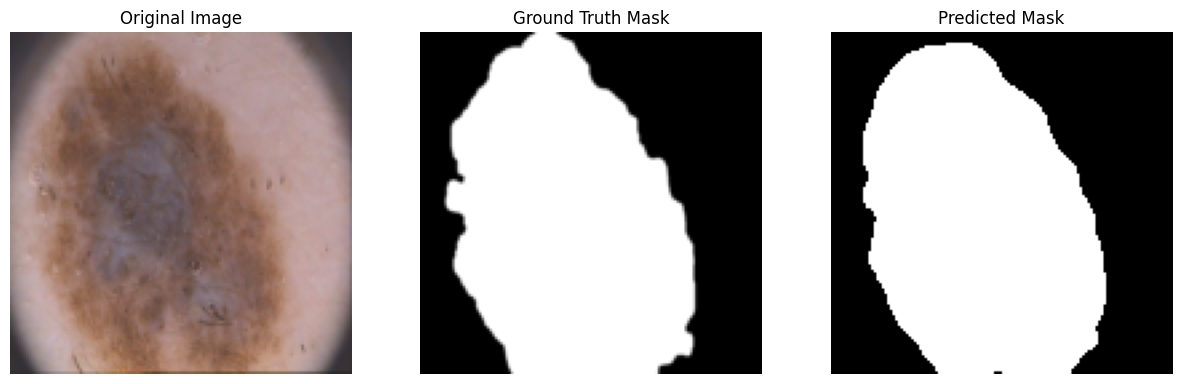

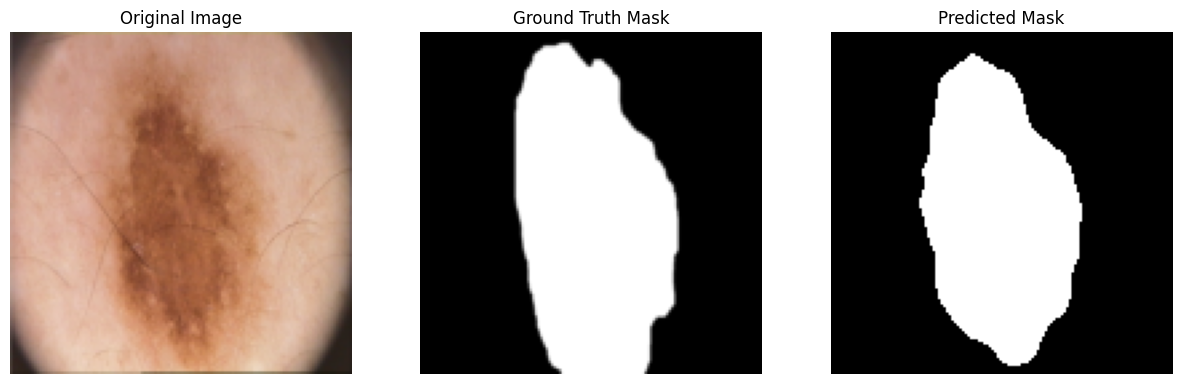

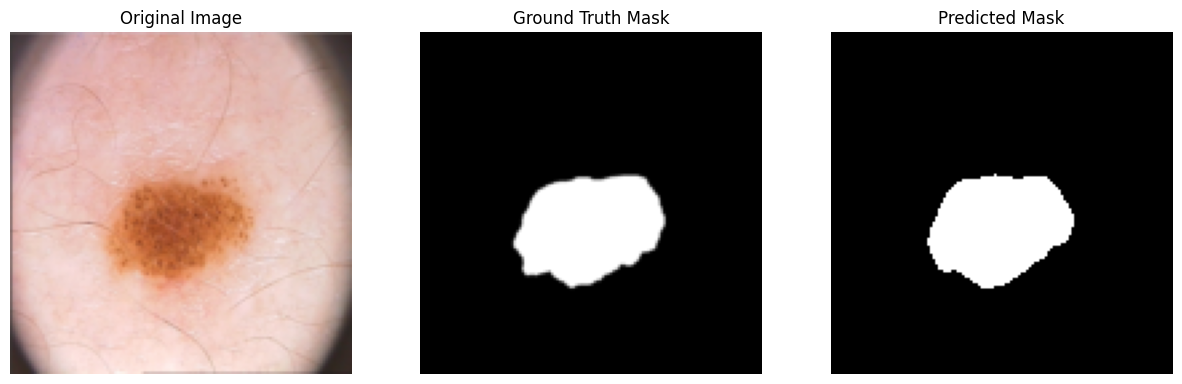

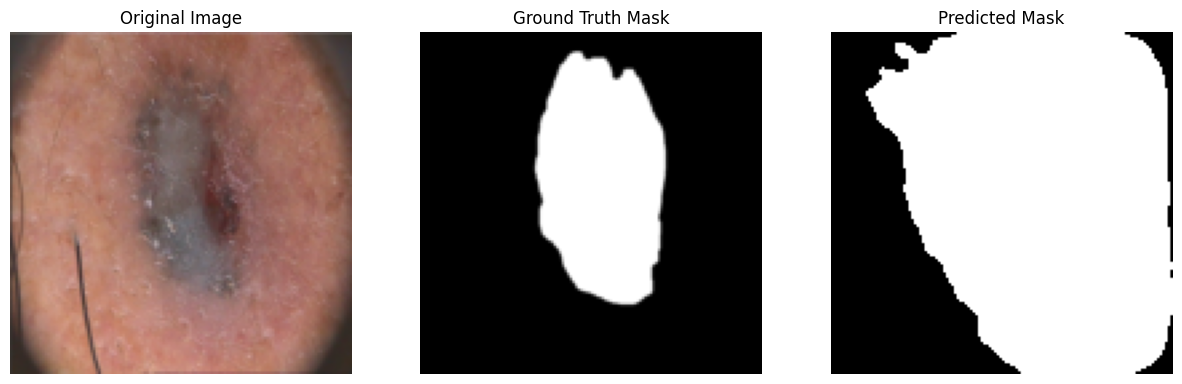

In [18]:
import matplotlib.pyplot as plt
import random

def show_random_predictions(model, data_loader, device, num_images=10):
    model.eval()
    
    # Collect a random batch from the data loader
    images, labels = next(iter(data_loader))
    
    # Move images and labels to the device
    images, labels = images.to(device), labels.to(device)
    
    # Get model predictions
    with torch.no_grad():
        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5  # Apply threshold to get binary mask
    
    # Move tensors to CPU for visualization
    images, labels, preds = images.cpu(), labels.cpu(), preds.cpu()
    
    # Select random indices
    random_indices = random.sample(range(images.size(0)), num_images)
    
    # Plot selected images
    for idx in random_indices:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        # Display original image
        ax[0].imshow(images[idx].permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C)
        ax[0].set_title("Original Image")
        
        # Display ground truth mask
        ax[1].imshow(labels[idx].squeeze(), cmap='gray')
        ax[1].set_title("Ground Truth Mask")
        
        # Display predicted mask
        ax[2].imshow(preds[idx].squeeze(), cmap='gray')
        ax[2].set_title("Predicted Mask")
        
        for a in ax:
            a.axis("off")
        
        plt.show()

# Call the function to display random predictions
show_random_predictions(model, test_loader, device)
